<a href="https://colab.research.google.com/github/GautierHanna/Circle-and-NN/blob/master/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Embedding, Activation, MaxPooling2D, Dropout
from keras.layers import Flatten, LSTM, ZeroPadding2D, BatchNormalization, MaxPooling2D

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


Question 1: Use skimage to load your “iguana.jpg” and display it in your notebook.

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99ca4a4f98>)

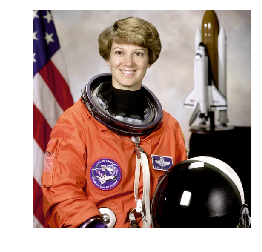

In [0]:
from skimage.measure import compare_ssim as ssim
from skimage import io
from skimage.transform import resize

from skimage import data
from skimage.viewer import ImageViewer
image = data.astronaut()

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4, 4))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax
  
image_show(image)






Question 2: Use skimage to zoom on the face of the iguana. Display the image.

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f99e331ee10>)

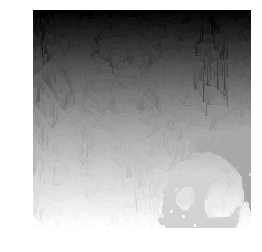

In [0]:
# Zoom image
import skimage.segmentation as seg

image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb)

Question 3: Use skimage to rescale the image to 20% of the initial size of the image. Display the image. Rescaling means lowering the resolution of the image. Remember that in class we talked about finding the computation/accuracy trade-off by showing different resolutions of the same image to humans and figuring out what is the minimum resolution leading to the maximum human accuracy.

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


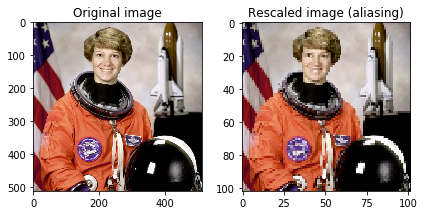

In [0]:
# Rescale image to 25% of the initial size
### START CODE HERE ###
from skimage import data, color
from skimage.transform import rescale

image_rescaled = rescale(image, 0.2, anti_aliasing=False)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 4: Use skimage to add random noise to the image. Display the image.

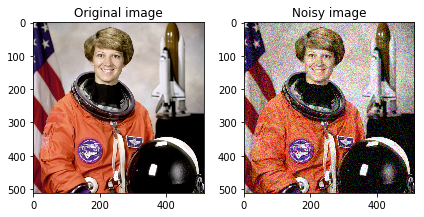

In [0]:
# Add random noise
### START CODE HERE ###
from skimage.util import random_noise

image_noisy = random_noise(image)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_noisy, cmap='gray')
ax[1].set_title("Noisy image")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 5: Use skimage to rotate the image by 45 degrees.

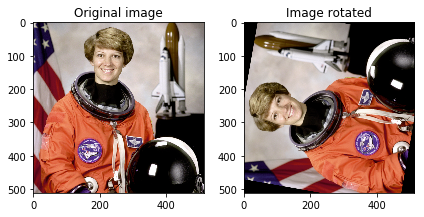

In [0]:
# Rotate
### START CODE HERE ###
from skimage.transform import rotate

image_rotated = rotate(image, 80)



fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rotated, cmap='gray')
ax[1].set_title("Image rotated")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 6: Use skimage to flip the image horizontaly and verticaly. Display the image.

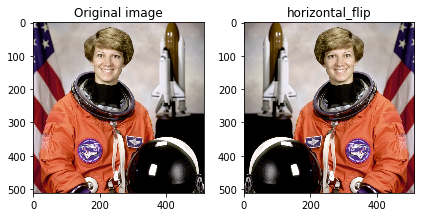

In [0]:
# Horizontal flip
### START CODE HERE ###
horizontal_flip = image[:, ::-1]

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(horizontal_flip, cmap='gray')
ax[1].set_title("horizontal_flip")

plt.tight_layout()
plt.show()
### END CODE HERE ###

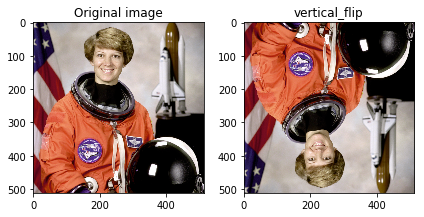

In [0]:
# Vertical flip
### START CODE HERE ###
vertical_flip = image[::-1, :]

fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(vertical_flip, cmap='gray')
ax[1].set_title("vertical_flip")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Question 7: (Optional) Use skimage to (i) blur the image, (ii) enhance its contrast, (iii) convert to grayscale, (iv) invert colors…

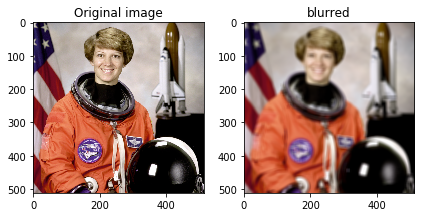

In [0]:
# Blur image
### START CODE HERE ###
from scipy import ndimage

blured_image = ndimage.uniform_filter(image, size=(11, 11, 1))


fig, axes = plt.subplots(nrows=1, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(blured_image, cmap='gray')
ax[1].set_title('blurred')

plt.tight_layout()
plt.show()

### END CODE HERE ###

# Convert to grayscale
### START CODE HERE ###

### END CODE HERE ###

# Enhance contrast
### START CODE HERE ###

### END CODE HERE ###

# Color inversion
### START CODE HERE ###

### END CODE HERE ###

Skimage is a popular package for customized data preprocessing and augmentation. However, deep learning frameworks such as Keras often incorporate functions to help you preprocess data in a few lines of code.

Question 8: Read and run the Keras code for image preprocessing. It will save augmented images in a folder called “preview” on the notebook’s directory.

Image preprocessing in Keras

In [0]:
# Image preprocessing in Keras

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest')

  # this is a PIL image
x = img_to_array(image)  # convert image to numpy array 
x = x.reshape((1,) + x.shape)  # reshape image to (1, ..,..,..) to fit keras' standard shape

# Use flow() to apply data augmentation randomly according to the datagenerator
# and saves the results to the `preview/` directory
num_image_generated = 0
for batch in datagen.flow(x, batch_size=1, save_format='jpeg'):
    num_image_generated += 1
    
    if num_image_generated > 20:
        break # stop the loop after num_image_generated iterations

Question 9: (Optional) Train the CNN coded for you in the notebook (See Appendix below) on any of the pictures you created. Evaluate the model.

Part II - Text data preprocessing
Question 1: Go on any static website online. Click right and select “View Page Source”. Copy a complicated part of the html code. Paste it in the notebook in the variable “html_page”.

In [16]:
### START CODE HERE ###
html_txt = """"<html lang="en">

  <head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">

  <title>Building a data pipeline</title>
  <meta name="description" content="Tutorial explaining how to use Tensorflow tf.data for text and images">

  <!-- minima them -->
  <link rel="stylesheet" href="/assets/css/main.css">

  <!-- bootstrap 4 (beta) -->
  <!-- <link rel="stylesheet" href="/assets/css/bootstrap.css"> -->

  <!-- custom css -->
  <link rel="stylesheet" href="/assets/css/custom.css">

  <link rel="canonical" href="https://cs230-stanford.github.io/tensorflow-input-data.html">
  <link rel="alternate" type="application/rss+xml" title="CS230 Deep Learning" href="/feed.xml">

  <!-- To handle menu on smartphones -->
  <script src="/assets/js/header.js"></script>

  <!-- jquery -->
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>

  <!-- Google fonts -->
  <link href='http://fonts.googleapis.com/css?family=Roboto:400,300' rel='stylesheet' type='text/css'>


  
  <script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-114319548-1', 'auto');
  ga('send', 'pageview');

</script>
  

  

  
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
    });
  </script>
  <script type="text/javascript" async
  src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  
</head>

  <!-- Begin Jekyll SEO tag v2.5.0 -->
<title>Building a data pipeline | CS230 Deep Learning</title>
<meta name="generator" content="Jekyll v3.7.3" />
<meta property="og:title" content="Building a data pipeline" />
<meta name="author" content="Teaching assistants Olivier Moindrot and Guillaume Genthial" />
<meta property="og:locale" content="en_US" />
<meta name="description" content="Tutorial explaining how to use Tensorflow tf.data for text and images" />
<meta property="og:description" content="Tutorial explaining how to use Tensorflow tf.data for text and images" />
<link rel="canonical" href="https://cs230-stanford.github.io/tensorflow-input-data.html" />
<meta property="og:url" content="https://cs230-stanford.github.io/tensorflow-input-data.html" />
<meta property="og:site_name" content="CS230 Deep Learning" />
<meta property="og:type" content="article" />
<meta property="article:published_time" content="2018-01-24T00:00:00+00:00" />
<script type="application/ld+json">
{"description":"Tutorial explaining how to use Tensorflow tf.data for text and images","author":{"@type":"Person","name":"Teaching assistants Olivier Moindrot and Guillaume Genthial"},"@type":"BlogPosting","url":"https://cs230-stanford.github.io/tensorflow-input-data.html","headline":"Building a data pipeline","dateModified":"2018-01-24T00:00:00+00:00","datePublished":"2018-01-24T00:00:00+00:00","mainEntityOfPage":{"@type":"WebPage","@id":"https://cs230-stanford.github.io/tensorflow-input-data.html"},"@context":"http://schema.org"}</script>
<!-- End Jekyll SEO tag -->


  <body>

    <header class="site-header" role="banner">

  <div class="wrapper title-wrapper">

    <a class="site-title" href="/">
    <img src="./assets/seal-dark-red.png" style="height:40px; float: left; margin-left: 20px; margin-right: 20px; margin-top: 10px">
    CS230 Deep Learning
    </a>

    
    </nav>

  </div>

</header>


    <main class="page-content" aria-label="Content" onclick="hideClass()">
      <div class="wrapper">
        <article class="post" itemscope itemtype="http://schema.org/BlogPosting">

  <header class="post-header">
    <h1 class="post-title" itemprop="name headline">Building a data pipeline</h1>
    <h3>Using Tensorflow tf.data for text and images</h3>
    <p class="post-meta"><time datetime="2018-01-24T00:00:00+00:00" itemprop="datePublished">Jan 24, 2018</time> • <span itemprop="author" itemscope itemtype="http://schema.org/Person"><span itemprop="name">Teaching assistants Olivier Moindrot and Guillaume Genthial</span></span></p>
    <div class="tags" style="margin-right: 10px">
      
        <div class="tag" style="float: none"> tensorflow</div>
      
        <div class="tag" style="float: none"> tf.data</div>
      
    </div>
     <a class="post-github" style="float: none; margin-left: 10px" href="https://github.com/cs230-stanford/cs230-code-examples/tree/master/tensorflow">github</a> 
  </header>

  <div class="post-content" itemprop="articleBody">
    <p>If you haven’t read the previous post,</p>

<div align="right"><a href="https://cs230-stanford.github.io/tensorflow-getting-started.html"><h3>&gt; Introduction to Tensorflow</h3></a></div>

<p><br /></p>

<p><strong>Motivation</strong></p>

<p>Building the input pipeline in a machine learning project is always long and painful, and can take more time than building the actual model.
In this tutorial we will learn how to use TensorFlow’s Dataset module <code class="highlighter-rouge">tf.data</code> to build efficient pipelines for images and text.</p>

<!-- TODO: keep the links? update them -->
<p>This tutorial is among a series explaining how to structure a deep learning project:
<!-- TODO: add here links to different posts --></p>
<ul>
  <li><a href="https://cs230-stanford.github.io/project-code-examples.html">first post</a>: installation, get started with the code for the projects</li>
  <li><a href="https://cs230-stanford.github.io/tensorflow-getting-started.html">second post</a>: (TensorFlow) explain the global structure of the code</li>
  <li><strong>this post: (TensorFlow) how to build the data pipeline</strong></li>
  <li><a href="https://cs230-stanford.github.io/tensorflow-model.html">fourth post</a>: (Tensorflow) how to build the model and train it</li>
</ul>

<p><strong>Goals of this tutorial</strong></p>
<ul>
  <li>learn how to use <code class="highlighter-rouge">tf.data</code> and the best practices</li>
  <li>build an efficient pipeline for loading images and preprocessing them</li>
  <li>build an efficient pipeline for text, including how to build a vocabulary</li>
</ul>

<p><strong>Table of contents</strong></p>

<ul id="markdown-toc">
  <li><a href="#an-overview-of-tfdata" id="markdown-toc-an-overview-of-tfdata">An overview of tf.data</a>    <ul>
      <li><a href="#introduction-to-tfdata-with-a-text-example" id="markdown-toc-introduction-to-tfdata-with-a-text-example">Introduction to tf.data with a Text Example</a></li>
      <li><a href="#iterators-and-transformations" id="markdown-toc-iterators-and-transformations">Iterators and transformations</a></li>
      <li><a href="#why-we-use-initializable-iterators" id="markdown-toc-why-we-use-initializable-iterators">Why we use initializable iterators</a></li>
      <li><a href="#where-do-i-find-the-data-pipeline-in-the-code-examples-" id="markdown-toc-where-do-i-find-the-data-pipeline-in-the-code-examples-">Where do I find the data pipeline in the code examples ?</a></li>
    </ul>
  </li>
  <li><a href="#building-an-image-data-pipeline" id="markdown-toc-building-an-image-data-pipeline">Building an image data pipeline</a></li>
  <li><a href="#building-a-text-data-pipeline" id="markdown-toc-building-a-text-data-pipeline">Building a text data pipeline</a>    <ul>
      <li><a href="#files-format" id="markdown-toc-files-format">Files format</a></li>
      <li><a href="#zip-datasets-together" id="markdown-toc-zip-datasets-together">Zip datasets together</a></li>
      <li><a href="#creating-the-vocabulary" id="markdown-toc-creating-the-vocabulary">Creating the vocabulary</a></li>
      <li><a href="#creating-padded-batches" id="markdown-toc-creating-padded-batches">Creating padded batches</a></li>
      <li><a href="#computing-the-sentences-size" id="markdown-toc-computing-the-sentences-size">Computing the sentence’s size</a></li>
      <li><a href="#advanced-use---extracting-characters" id="markdown-toc-advanced-use---extracting-characters">Advanced use - extracting characters</a></li>
    </ul>
  </li>
  <li><a href="#best-practices" id="markdown-toc-best-practices">Best Practices</a>    <ul>
      <li><a href="#shuffle-and-repeat" id="markdown-toc-shuffle-and-repeat">Shuffle and repeat</a></li>
      <li><a href="#parallelization-using-multiple-threads" id="markdown-toc-parallelization-using-multiple-threads">Parallelization: using multiple threads</a></li>
      <li><a href="#prefetch-data" id="markdown-toc-prefetch-data">Prefetch data</a></li>
      <li><a href="#order-of-the-operations" id="markdown-toc-order-of-the-operations">Order of the operations</a></li>
    </ul>
  </li>
</ul>

<hr />

<h2 id="an-overview-of-tfdata">An overview of tf.data</h2>

<p>The <code class="highlighter-rouge">Dataset</code> API allows you to build an asynchronous, highly optimized data pipeline to prevent your GPU from <a href="https://www.tensorflow.org/performance/performance_guide#input_pipeline_optimization">data starvation</a>.
It loads data from the disk (images or text), applies optimized transformations, creates batches and sends it to the GPU. Former data pipelines made the GPU wait for the CPU to load the data, leading to performance issues.</p>

<p>Before explaining how <code class="highlighter-rouge">tf.data</code> works with a simple example, we’ll share some great official resources:</p>
<ul>
  <li><a href="https://www.tensorflow.org/api_docs/python/tf/data">API docs</a> for <code class="highlighter-rouge">tf.data</code></li>
  <li><a href="https://www.tensorflow.org/api_docs/python/tf/contrib/data">API docs</a> for <code class="highlighter-rouge">tf.contrib.data</code>: new features still in beta mode. Contains useful functions that will soon be added to the main <code class="highlighter-rouge">tf.data</code></li>
  <li><a href="https://www.tensorflow.org/get_started/datasets_quickstart">Datasets Quick Start</a>: gentle introduction to <code class="highlighter-rouge">tf.data</code></li>
  <li><a href="https://www.tensorflow.org/programmers_guide/datasets">Programmer’s guide</a>: more advanced and detailed guide to the best practices when using Datasets in TensorFlow</li>
  <li><a href="https://www.tensorflow.org/performance/performance_guide#input_pipeline_optimization">Performance guide</a>: advanced guide to improve performance of the data pipeline</li>
  <li><a href="https://developers.googleblog.com/2017/09/introducing-tensorflow-datasets.html">Official blog post</a> introducing Datasets and Estimators. We don’t use Estimators in our <a href="https://github.com/cs230-stanford/cs230-code-examples">code examples</a> so you can safely ignore them for now.</li>
  <li><a href="https://docs.google.com/presentation/d/16kHNtQslt-yuJ3w8GIx-eEH6t_AvFeQOchqGRFpAD7U">Slides from the creator of tf.data</a> explaining the API, best practices (don’t forget to read the speaker notes below the slides)</li>
  <li><a href="https://github.com/tensorflow/tensorflow/issues/7951">Origin github issue</a> for Datasets: a bit of history on the origin of <code class="highlighter-rouge">tf.data</code></li>
  <li><a href="https://stackoverflow.com/questions/tagged/tensorflow-datasets">Stackoverflow</a> tag for the Datasets API</li>
</ul>

<h3 id="introduction-to-tfdata-with-a-text-example">Introduction to tf.data with a Text Example</h3>

<p>Let’s go over a quick example. Let’s say we have a <code class="highlighter-rouge">file.txt</code> file containing sentences</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>I use Tensorflow
You use PyTorch
Both are great
</code></pre></div></div>

<p>Let’s read this file with the <code class="highlighter-rouge">tf.data</code> API:</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">dataset</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">TextLineDataset</span><span class="p">(</span><span class="s">"file.txt"</span><span class="p">)</span>
</code></pre></div></div>

<p>Let’s try to iterate over it</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="k">for</span> <span class="n">line</span> <span class="ow">in</span> <span class="n">dataset</span><span class="p">:</span>
    <span class="k">print</span><span class="p">(</span><span class="n">line</span><span class="p">)</span>
</code></pre></div></div>

<p>We get an error</p>
<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>&gt; TypeError: 'TextLineDataset' object is not iterable
</code></pre></div></div>

<blockquote>
  <p>Wait… What just happened ? I thought it was supposed to read the data.</p>
</blockquote>

<h3 id="iterators-and-transformations">Iterators and transformations</h3>

<p>What’s really happening is that <code class="highlighter-rouge">dataset</code> is a node of the Tensorflow <code class="highlighter-rouge">Graph</code> that contains instructions to read the file. We need to initialize the graph and evaluate this node in a Session if we want to read it. While this may sound awfully complicated, this is quite the oposite : now, even the dataset object is a part of the graph, so you don’t need to worry about how to feed the data into your model !</p>

<p>We need to add a few things to make it work. First, let’s create an <code class="highlighter-rouge">iterator</code> object over the dataset</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()
</code></pre></div></div>
<blockquote>
  <p>The <code class="highlighter-rouge">one_shot_iterator</code> method creates an iterator that will be able to iterate once over the dataset. In other words, once we reach the end of the dataset, it will stop yielding elements and raise an Exception.</p>
</blockquote>

<p>Now, <code class="highlighter-rouge">next_element</code> is a graph’s node that will contain the next element of iterator over the Dataset at each execution. Now, let’s run it</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="k">with</span> <span class="n">tf</span><span class="o">.</span><span class="n">Session</span><span class="p">()</span> <span class="k">as</span> <span class="n">sess</span><span class="p">:</span>
    <span class="k">for</span> <span class="n">i</span> <span class="ow">in</span> <span class="nb">range</span><span class="p">(</span><span class="mi">3</span><span class="p">):</span>
        <span class="k">print</span><span class="p">(</span><span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">next_element</span><span class="p">))</span>

<span class="o">&gt;</span><span class="s">'I use Tensorflow'</span>
<span class="o">&gt;</span><span class="s">'You use PyTorch'</span>
<span class="o">&gt;</span><span class="s">'Both are great'</span>
</code></pre></div></div>

<p>Now that you understand the idea behind the <code class="highlighter-rouge">tf.data</code> API, let’s quickly review some more advanced tricks. First, you can easily apply transformations to your dataset. For instance, splitting words by space is as easy as adding one line</p>
<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="nb">map</span><span class="p">(</span><span class="k">lambda</span> <span class="n">string</span><span class="p">:</span> <span class="n">tf</span><span class="o">.</span><span class="n">string_split</span><span class="p">([</span><span class="n">string</span><span class="p">])</span><span class="o">.</span><span class="n">values</span><span class="p">)</span>
</code></pre></div></div>

<p>Shuffling the dataset is also straightforward</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">shuffle</span><span class="p">(</span><span class="n">buffer_size</span><span class="o">=</span><span class="mi">3</span><span class="p">)</span>
</code></pre></div></div>

<p>It will load elements 3 by 3 and shuffle them at each iteration.</p>

<p>You can also create batches</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>dataset = dataset.batch(2)
</code></pre></div></div>

<p>and pre-fetch the data (in other words, it will always have one batch ready to be loaded).</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>dataset = dataset.prefetch(1)
</code></pre></div></div>

<p>Now, let’s see what our iterator has become</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">iterator</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">make_one_shot_iterator</span><span class="p">()</span>
<span class="n">next_element</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">get_next</span><span class="p">()</span>
<span class="k">with</span> <span class="n">tf</span><span class="o">.</span><span class="n">Session</span><span class="p">()</span> <span class="k">as</span> <span class="n">sess</span><span class="p">:</span>
    <span class="k">print</span><span class="p">(</span><span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">next_element</span><span class="p">))</span>

<span class="o">&gt;</span><span class="p">[[</span><span class="s">'Both'</span> <span class="s">'are'</span> <span class="s">'great'</span><span class="p">]</span>
  <span class="p">[</span><span class="s">'You'</span> <span class="s">'use'</span> <span class="s">'PyTorch'</span><span class="p">]]</span>
</code></pre></div></div>

<p>and as you can see, we now have a batch created from the shuffled Dataset !</p>

<p><strong>All the nodes in the Graph are assumed to be batched: every Tensor will have <code class="highlighter-rouge">shape = [None, ...]</code> where None corresponds to the (unspecified) batch dimension</strong></p>

<h3 id="why-we-use-initializable-iterators">Why we use initializable iterators</h3>

<p>As you’ll see in the <code class="highlighter-rouge">input_fn.py</code> files, we decided to use an initializable iterator.</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">dataset</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">TextLineDataset</span><span class="p">(</span><span class="s">"file.txt"</span><span class="p">)</span>
<span class="n">iterator</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">make_initializable_iterator</span><span class="p">()</span>
<span class="n">next_element</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">get_next</span><span class="p">()</span>
<span class="n">init_op</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">initializer</span>
</code></pre></div></div>

<p>Its behavior is similar to the one above, but thanks to the <code class="highlighter-rouge">init_op</code> we can chose to “restart” from the beginning. This will become quite handy when we want to perform multiple epochs !</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="k">with</span> <span class="n">tf</span><span class="o">.</span><span class="n">Session</span><span class="p">()</span> <span class="k">as</span> <span class="n">sess</span><span class="p">:</span>
    <span class="c"># Initialize the iterator</span>
    <span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">init_op</span><span class="p">)</span>
    <span class="k">print</span><span class="p">(</span><span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">next_element</span><span class="p">))</span>
    <span class="k">print</span><span class="p">(</span><span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">next_element</span><span class="p">))</span>
    <span class="c"># Move the iterator back to the beginning</span>
    <span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">init_op</span><span class="p">)</span>
    <span class="k">print</span><span class="p">(</span><span class="n">sess</span><span class="o">.</span><span class="n">run</span><span class="p">(</span><span class="n">next_element</span><span class="p">))</span>

<span class="o">&gt;</span> <span class="s">'I use Tensorflow'</span>
  <span class="s">'You use PyTorch'</span>
  <span class="s">'I use Tensorflow'</span> <span class="c"># Iterator moved back at the beginning</span>
</code></pre></div></div>

<blockquote>
  <p>As we use only one session over the different epochs, we need to be able to restart the iterator. Some other approaches (like <code class="highlighter-rouge">tf.Estimator</code>) alleviate the need of using <code class="highlighter-rouge">initializable</code> iterators by creating a new session at each epoch. But this comes at a cost: the weights and the graph must be re-loaded and re-initialized with each call to <code class="highlighter-rouge">estimator.train()</code> or <code class="highlighter-rouge">estimator.evaluate()</code>.</p>
</blockquote>

<h3 id="where-do-i-find-the-data-pipeline-in-the-code-examples-">Where do I find the data pipeline in the code examples ?</h3>

<p>The <code class="highlighter-rouge">model/input_fn.py</code> defines a function <code class="highlighter-rouge">input_fn</code> that returns a dictionnary that looks like</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">images</span><span class="p">,</span> <span class="n">labels</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">get_next</span><span class="p">()</span>
<span class="n">iterator_init_op</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">initializer</span>

<span class="n">inputs</span> <span class="o">=</span> <span class="p">{</span><span class="s">'images'</span><span class="p">:</span> <span class="n">images</span><span class="p">,</span> <span class="s">'labels'</span><span class="p">:</span> <span class="n">labels</span><span class="p">,</span> <span class="s">'iterator_init_op'</span><span class="p">:</span> <span class="n">iterator_init_op</span><span class="p">}</span>
</code></pre></div></div>

<p>This dictionay of inputs will be passed to the model function, which we will detail in the <a href="https://cs230-stanford.github.io/tensorflow-model.html">next post</a>.</p>

<h2 id="building-an-image-data-pipeline">Building an image data pipeline</h2>

<p>Here is what a Dataset for images might look like. Here we already have a list of <code class="highlighter-rouge">filenames</code> to jpeg images and a corresponding list of <code class="highlighter-rouge">labels</code>. We apply the following steps for training:</p>

<ol>
  <li>Create the dataset from slices of the filenames and labels</li>
  <li>Shuffle the data with a buffer size equal to the length of the dataset. This ensures good shuffling (cf. <a href="https://stackoverflow.com/a/48096625/5098368">this answer</a>)</li>
  <li>Parse the images from filename to the pixel values. Use multiple threads to improve the speed of preprocessing</li>
  <li>(Optional for training) Data augmentation for the images. Use multiple threads to improve the speed of preprocessing</li>
  <li>Batch the images</li>
  <li>Prefetch one batch to make sure that a batch is ready to be served at all time</li>
</ol>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="n">dataset</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">Dataset</span><span class="o">.</span><span class="n">from_tensor_slices</span><span class="p">((</span><span class="n">filenames</span><span class="p">,</span> <span class="n">labels</span><span class="p">))</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">shuffle</span><span class="p">(</span><span class="nb">len</span><span class="p">(</span><span class="n">filenames</span><span class="p">))</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="nb">map</span><span class="p">(</span><span class="n">parse_function</span><span class="p">,</span> <span class="n">num_parallel_calls</span><span class="o">=</span><span class="mi">4</span><span class="p">)</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="nb">map</span><span class="p">(</span><span class="n">train_preprocess</span><span class="p">,</span> <span class="n">num_parallel_calls</span><span class="o">=</span><span class="mi">4</span><span class="p">)</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">batch</span><span class="p">(</span><span class="n">batch_size</span><span class="p">)</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">prefetch</span><span class="p">(</span><span class="mi">1</span><span class="p">)</span>
</code></pre></div></div>

<p>The <code class="highlighter-rouge">parse_function</code> will do the following:</p>
<ul>
  <li>read the content of the file</li>
  <li>decode using jpeg format</li>
  <li>convert to float values in <code class="highlighter-rouge">[0, 1]</code></li>
  <li>resize to size <code class="highlighter-rouge">(64, 64)</code></li>
</ul>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="k">def</span> <span class="nf">parse_function</span><span class="p">(</span><span class="n">filename</span><span class="p">,</span> <span class="n">label</span><span class="p">):</span>
    <span class="n">image_string</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">read_file</span><span class="p">(</span><span class="n">filename</span><span class="p">)</span>

    <span class="c"># Don't use tf.image.decode_image, or the output shape will be undefined</span>
    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">decode_jpeg</span><span class="p">(</span><span class="n">image_string</span><span class="p">,</span> <span class="n">channels</span><span class="o">=</span><span class="mi">3</span><span class="p">)</span>

    <span class="c"># This will convert to float values in [0, 1]</span>
    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">convert_image_dtype</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="n">tf</span><span class="o">.</span><span class="n">float32</span><span class="p">)</span>

    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">resize_images</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="p">[</span><span class="mi">64</span><span class="p">,</span> <span class="mi">64</span><span class="p">])</span>
    <span class="k">return</span> <span class="n">resized_image</span><span class="p">,</span> <span class="n">label</span>
</code></pre></div></div>

<p>And finally the <code class="highlighter-rouge">train_preprocess</code> can be optionally used during training to perform data augmentation:</p>
<ul>
  <li>Horizontally flip the image with probability 1/2</li>
  <li>Apply random brightness and saturation</li>
</ul>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="k">def</span> <span class="nf">train_preprocess</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="n">label</span><span class="p">):</span>
    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">random_flip_left_right</span><span class="p">(</span><span class="n">image</span><span class="p">)</span>

    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">random_brightness</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="n">max_delta</span><span class="o">=</span><span class="mf">32.0</span> <span class="o">/</span> <span class="mf">255.0</span><span class="p">)</span>
    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">image</span><span class="o">.</span><span class="n">random_saturation</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="n">lower</span><span class="o">=</span><span class="mf">0.5</span><span class="p">,</span> <span class="n">upper</span><span class="o">=</span><span class="mf">1.5</span><span class="p">)</span>

    <span class="c"># Make sure the image is still in [0, 1]</span>
    <span class="n">image</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">clip_by_value</span><span class="p">(</span><span class="n">image</span><span class="p">,</span> <span class="mf">0.0</span><span class="p">,</span> <span class="mf">1.0</span><span class="p">)</span>

    <span class="k">return</span> <span class="n">image</span><span class="p">,</span> <span class="n">label</span>
</code></pre></div></div>

<h2 id="building-a-text-data-pipeline">Building a text data pipeline</h2>

<p>Have a look at the Tensorflow seq2seq tutorial using the tf.data pipeline</p>
<ul>
  <li><a href="https://www.tensorflow.org/tutorials/seq2seq">documentation</a></li>
  <li><a href="https://github.com/tensorflow/nmt/">github</a></li>
</ul>

<h3 id="files-format">Files format</h3>

<p>We’ve covered a simple example in the <strong>Overview of tf.data</strong> section. Now, let’s cover a more advanced example. Let’s assume that our task is <a href="https://en.wikipedia.org/wiki/Named-entity_recognition">Named Entity Recognition</a>. In other words, our input is a sentence, and our output is a label for each word, like in</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code>John   lives in New   York
B-PER  O     O  B-LOC I-LOC
</code></pre></div></div>

<p>Our dataset will thus need to load both the sentences and the labels. We will store those in 2 different files, a <code class="highlighter-rouge">sentence.txt</code> file containing the sentences (one per line) and a <code class="highlighter-rouge">labels.txt</code> containing the labels. For example</p>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code># sentences.txt
John lives in New York
Where is John ?
</code></pre></div></div>

<div class="highlighter-rouge"><div class="highlight"><pre class="highlight"><code># labels.txt
B-PER O O B-LOC I-LOC
O O B-PER O
</code></pre></div></div>

<p>Constructing <code class="highlighter-rouge">tf.data</code> objects that iterate over these files is easy</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="c"># Load txt file, one example per line</span>
<span class="n">sentences</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">TextLineDataset</span><span class="p">(</span><span class="s">"sentences.txt"</span><span class="p">)</span>
<span class="n">labels</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">TextLineDataset</span><span class="p">(</span><span class="s">"labels.txt"</span><span class="p">)</span>
</code></pre></div></div>

<h3 id="zip-datasets-together">Zip datasets together</h3>

<p>At this stage, we might want to iterate over these 2 files <em>at the same time</em>. This operation is usually known as a <em>“zip”</em>. Luckilly, the <code class="highlighter-rouge">tf.data</code> comes with such a function</p>

<div class="language-python highlighter-rouge"><div class="highlight"><pre class="highlight"><code><span class="c"># Zip the sentence and the labels together</span>
<span class="n">dataset</span> <span class="o">=</span> <span class="n">tf</span><span class="o">.</span><span class="n">data</span><span class="o">.</span><span class="n">Dataset</span><span class="o">.</span><span class="nb">zip</span><span class="p">((</span><span class="n">sentences</span><span class="p">,</span> <span class="n">labels</span><span class="p">))</span>

<span class="c"># Create a one shot iterator over the zipped dataset</span>
<span class="n">iterator</span> <span class="o">=</span> <span class="n">dataset</span><span class="o">.</span><span class="n">make_one_shot_iterator</span><span class="p">()</span>
<span class="n">next_element</span> <span class="o">=</span> <span class="n">iterator</span><span class="o">.</span><span class="n">get_next</span><span class="p">()</span>



</html>

"""
### END CODE HERE ###

print(html_txt)

"<html lang="en">

  <head>
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1">

  <title>Building a data pipeline</title>
  <meta name="description" content="Tutorial explaining how to use Tensorflow tf.data for text and images">

  <!-- minima them -->
  <link rel="stylesheet" href="/assets/css/main.css">

  <!-- bootstrap 4 (beta) -->
  <!-- <link rel="stylesheet" href="/assets/css/bootstrap.css"> -->

  <!-- custom css -->
  <link rel="stylesheet" href="/assets/css/custom.css">

  <link rel="canonical" href="https://cs230-stanford.github.io/tensorflow-input-data.html">
  <link rel="alternate" type="application/rss+xml" title="CS230 Deep Learning" href="/feed.xml">

  <!-- To handle menu on smartphones -->
  <script src="/assets/js/header.js"></script>

  <!-- jquery -->
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>

  <!-- Google fonts -->

Question 2: Use BeautifulSoup to parse the html_txt. Print the html_txt.

In [17]:
from bs4 import BeautifulSoup

# Parse the html input
### START CODE HERE ###
soup = BeautifulSoup(html_txt, 'html.parser')
### END CODE HERE ###

print(soup.prettify())


"
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Building a data pipeline
  </title>
  <meta content="Tutorial explaining how to use Tensorflow tf.data for text and images" name="description"/>
  <!-- minima them -->
  <link href="/assets/css/main.css" rel="stylesheet"/>
  <!-- bootstrap 4 (beta) -->
  <!-- <link rel="stylesheet" href="/assets/css/bootstrap.css"> -->
  <!-- custom css -->
  <link href="/assets/css/custom.css" rel="stylesheet"/>
  <link href="https://cs230-stanford.github.io/tensorflow-input-data.html" rel="canonical"/>
  <link href="/feed.xml" rel="alternate" title="CS230 Deep Learning" type="application/rss+xml"/>
  <!-- To handle menu on smartphones -->
  <script src="/assets/js/header.js">
  </script>
  <!-- jquery -->
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js">
  </script>
  <!-- Goog

Question 3: Use re to remove meta-characters such as squared brackets and anything between them. Print the html_txt.

In [18]:
print(soup.get_text())

"




Building a data pipeline
















  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-114319548-1', 'auto');
  ga('send', 'pageview');



    MathJax.Hub.Config({
      tex2jax: {inlineMath: [['$','$'], ['\(','\)']]}
    });
  




Building a data pipeline | CS230 Deep Learning












{"description":"Tutorial explaining how to use Tensorflow tf.data for text and images","author":{"@type":"Person","name":"Teaching assistants Olivier Moindrot and Guillaume Genthial"},"@type":"BlogPosting","url":"https://cs230-stanford.github.io/tensorflow-input-data.html","headline":"Building a data pipeline","dateModified":"2018-01-24T00:00:00+00:00","datePublished":"2018-01-24T00:00:00+00:00","m

In [26]:
import re, string, unicodedata
# Remove meta characters and things between them.
### START CODE HERE ###
data= soup.get_text()
### END CODE HERE ###
def remove_between_square_brackets(text):
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub('\([^]]*\)', '', text)
    text = re.sub('\{[^]]*\}', '', text)
    return text

data = remove_between_square_brackets(data)

print(data)

"




Building a data pipeline
















  ;



    MathJax.Hub.Config({
      tex2jax: {inlineMath: , ]}
    });
  




Building a data pipeline | CS230 Deep Learning



















    CS230 Deep Learning
    







Building a data pipeline
Using Tensorflow tf.data for text and images
Jan 24, 2018 • Teaching assistants Olivier Moindrot and Guillaume Genthial

 tensorflow
 tf.data

github


If you haven’t read the previous post,
> Introduction to Tensorflow

Motivation
Building the input pipeline in a machine learning project is always long and painful, and can take more time than building the actual model.
In this tutorial we will learn how to use TensorFlow’s Dataset module tf.data to build efficient pipelines for images and text.

This tutorial is among a series explaining how to structure a deep learning project:


first post: installation, get started with the code for the projects
second post: 

>
  ]

and as you can see, we now have a batch created from the shuffled 

Question 4: Using the Natural Language ToolKit (nltk), separate the text into a list of words.

In [27]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize

# Separate text into words
### START CODE HERE ###

print(word_tokenize(data))
### END CODE HERE ###

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['``', 'Building', 'a', 'data', 'pipeline', ';', 'MathJax.Hub.Config', '(', '{', 'tex2jax', ':', '{', 'inlineMath', ':', ',', ']', '}', '}', ')', ';', 'Building', 'a', 'data', 'pipeline', '|', 'CS230', 'Deep', 'Learning', 'CS230', 'Deep', 'Learning', 'Building', 'a', 'data', 'pipeline', 'Using', 'Tensorflow', 'tf.data', 'for', 'text', 'and', 'images', 'Jan', '24', ',', '2018', '•', 'Teaching', 'assistants', 'Olivier', 'Moindrot', 'and', 'Guillaume', 'Genthial', 'tensorflow', 'tf.data', 'github', 'If', 'you', 'haven', '’', 't', 'read', 'the', 'previous', 'post', ',', '>', 'Introduction', 'to', 'Tensorflow', 'Motivation', 'Building', 'the', 'input', 'pipeline', 'in', 'a', 'machine', 'learning', 'project', 'is', 'always', 'long', 'and', 'painful', ',', 'and', 'can', 'take', 'more', 'time', 'than', 'building', 'the', 'actual', 'model', '.', 'In', 'this', 'tutorial', 'we', 'will', 

Question 5: (Optional) Remove non ASCII characters. Convert to Lower case. Remove punctuation, stopwords, …

In [0]:
### START CODE HERE ###

### END CODE HERE ###

A machine will not be able to read this list strings, you need to build a vocabulary and tokenize your words.

Question 6: Build the vocabulary from the list of words.

In [0]:
# Build Vocabulary
### START CODE HERE ###

### END CODE HERE ###

Question 7: Build word to integer mapping in Python. It should be sorted.

In [0]:
# Build word to integer mapping in Python. It should be sorted.
### START CODE HERE ###

### END CODE HERE ###

Question 8: Tokenize your text.

In [0]:
# Convert list of words into list of tokens using this mapping
### START CODE HERE ###

### END CODE HERE ###

Question 9: Read and run the Keras code for text preprocessing. It uses the Tokenizer Function.

In [0]:
# Preprocess text with Keras for Sentiment classification
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

examples = ['You are amazing!','It is so bad','Congratulations','You suck bro','Awesome dude!']
Y = [1, 0, 1, 0, 1]

# Define Tokenizer
t = Tokenizer()
# Fit Tokenizer on text (Build vocab etc..)
t.fit_on_texts(examples)
# Convert texts to sequences of integers
X = t.texts_to_sequences(examples)
# Pad sequences of integers
X = pad_sequences(X, padding = 'post')

# Get the vocabulary size, useful for the embedding layer.
vocab_size = len(t.word_index) + 1
print(vocab_size)
print(X)

Question 10: (Optional) Train the RNN coded for you in the notebook on the sentiment classification class (with 5 examples). Evaluate the mode.

Appendix: Models and training codes

In [0]:
# CNN
model_CNN = Sequential()
model_CNN.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = image.shape))
model_CNN.add(BatchNormalization(axis = 3, name = 'bn0'))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D((2, 2), name='max_pool'))
model_CNN.add(Flatten())
model_CNN.add(Dense(1, activation='sigmoid', name='fc'))

NameError: ignored

In [0]:
# RNN
model_RNN = Sequential()
model_RNN.add(Embedding(vocab_size, 128))
model_RNN.add(LSTM(128))
model_RNN.add(Dense(1, activation='sigmoid'))

NameError: ignored

In [0]:
# training code for CNN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_CNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_CNN.fit(np.expand_dims(image, axis=0), np.array([1]), epochs=2)

NameError: ignored

In [0]:
# training code for RNN
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_RNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_RNN.fit(np.array(X), np.array(Y), epochs=1000)

NameError: ignored

In [0]:
# testing code for CNN
model_CNN.predict(np.expand_dims(image_blured, axis=0))

NameError: ignored